# Определение наиболее выгодного региона нефтедобычи

### Описание проекта

Предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Необходимо построить модель для определения региона, где добыча принесёт наибольшую прибыль, а также проанализировать возможную прибль и риски.
При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки. Бюджет на разработку скважин в регионе — 10 млрд рублей.При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

### План проекта

    1. Загрузка и подготовка данных
    2. Обучение и проверка модели
    3. Подготовка к расчету прибыли
    4. Расчет прибыли и рисков
    5. Выводы

### Описание данных

Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов.

### 1. Загрузка и подготовка данных

In [1]:
#загружаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState

In [2]:
#загружаем датсеты
try:
    data_0 = pd.read_csv('geo_data_0.csv')
except:
    data_0 = pd.read_csv('/datasets/geo_data_0.csv')
    
try:
    data_1 = pd.read_csv('geo_data_1.csv')
except:
    data_1 = pd.read_csv('/datasets/geo_data_1.csv') 
    
try:
    data_2 = pd.read_csv('geo_data_2.csv')
except:
    data_2 = pd.read_csv('/datasets/geo_data_2.csv')

Подробнее ознкомимся с датасетом 0:

In [295]:
#выведем первые 10 строк:
data_0.head(10)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [296]:
#выведем информацию о датасете:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


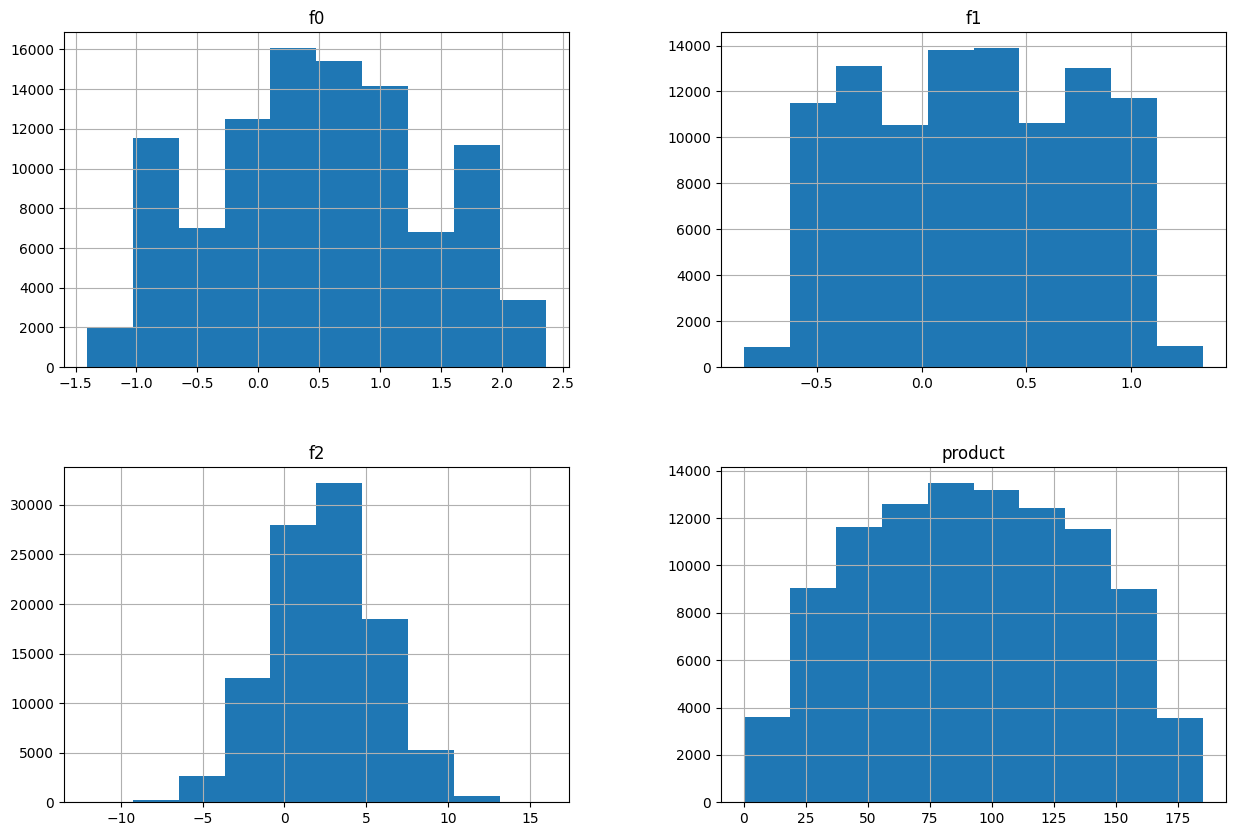

In [297]:
#построим гистограммы:
data_0.hist(figsize=(15,10));

In [298]:
#поиск дубликатов:
data_0.duplicated().sum()

0

In [3]:
#выделим признаки для обучения модели и целевой признак:
features_0 = data_0.drop(['id', 'product'], axis=1)
target_0 = data_0['product']

Подробнее ознкомимся с датасетом 1:

In [300]:
#выведем для ознакомления первых 10 строк:
data_1.head(10)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [301]:
#общая информация о датасете:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


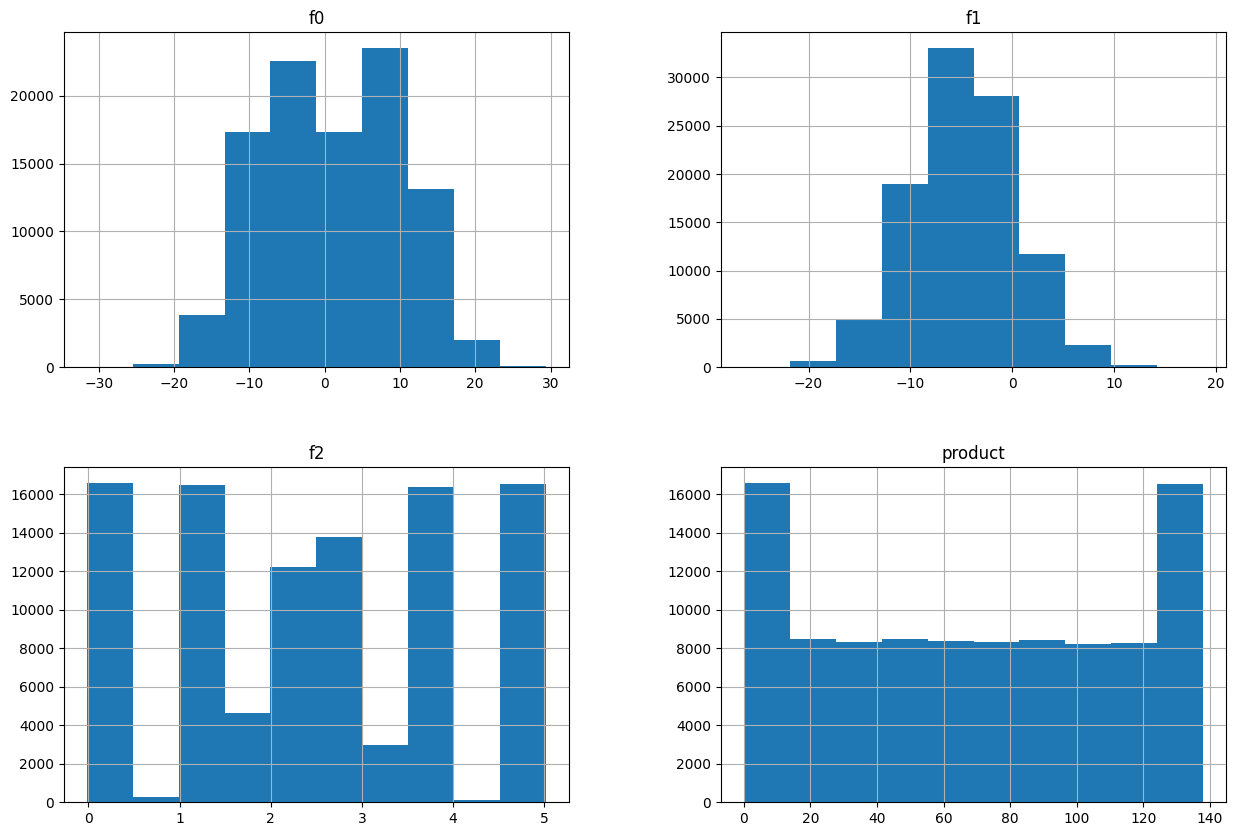

In [302]:
#построим гистограммы:
data_1.hist(figsize=(15,10));

In [303]:
#поиск дубликатов:
data_1.duplicated().sum()

0

In [4]:
#выделим признаки для обучения модели и целевой признак:
features_1 = data_1.drop(['id', 'product'], axis=1)
target_1 = data_1['product']

Подробнее ознкомимся с датасетом 2:

In [305]:
#выведем первые 10 строк для ознакомления:
data_2.head(10)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


In [306]:
#общая информация о датасете:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


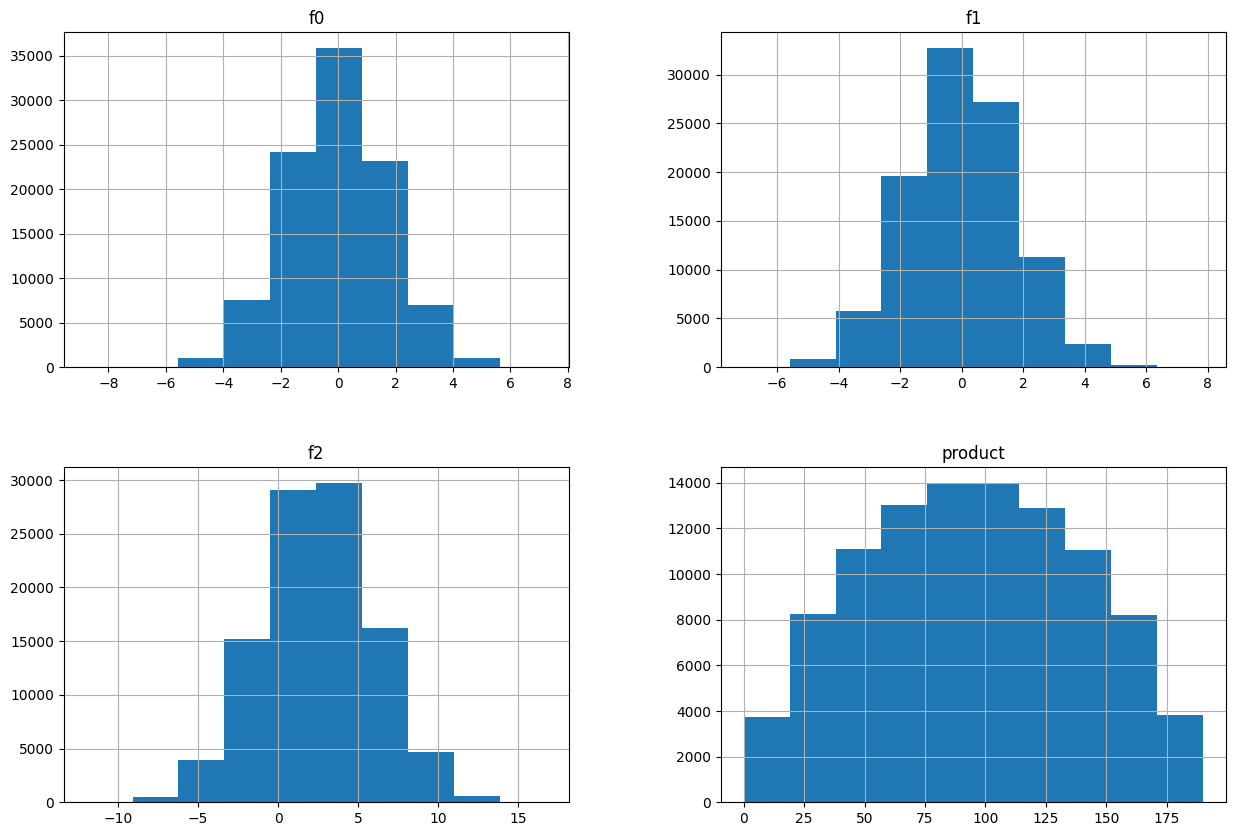

In [307]:
#построим гистограммы:
data_2.hist(figsize=(15,10));

In [308]:
#поиск дубликатов:
data_2.duplicated().sum()

0

In [5]:
#выделим признаки для обучения модели и целевой признак:
features_2 = data_2.drop(['id', 'product'], axis=1)
target_2 = data_2['product']

### Выводы:
    
      1) В исходных данных предотавлена информация о 3 регионах, в каждом из которых хранится иформация о 100000 скважинах
      2) Пропущенных значений в данных нет
      3) Тип данных в столбцах корректный
      4) Явных дубликатов нет
      5) Столбцы с указанием id скважины не несут смысловую нагрузку для модели
      6) Аномальных значений не выявлено
      7) Большого разброса в значениях количественных признаков не выявлено, поэтому производить масштабирование нет необходимости
      8) Во всех регионах выделены признаки и целевой признак

### 2. Обучение и проверка модели

In [6]:
#создадим таблицу для хранения значений средних запасов предсказанного сырья, RMSE и r2 моделей
table_mean_rmse_model = pd.DataFrame(0, index=['region_0', 'region_1', 'region_2'], columns=['mean_product', 'rmse'])

In [7]:
# функция для разбиеная данных на обучающую и валидационную выборки, обучения модели, вычисления среднего запаса сырья, а также значений метрик rmse и r2 для модели:
def train_and_check_model(region, features, target):
    #разбиваем данные на обучающую и валидационную выборки:
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, \
                                                                                       test_size=0.25, random_state=12345)
    model = LinearRegression() #создаем модель
    model.fit(features_train, target_train) #обучаем 
    target_predictions = model.predict(features_valid) #сохраняем предсказания
    target_predictions = pd.Series(target_predictions, index=features_valid.index) #определяем для предсказаний соответствующие индексы скважин
    table_mean_rmse_model.loc[region, 'mean_product'] = target_predictions.mean() #средний запас предсказанного сырья
    table_mean_rmse_model.loc[region, 'rmse'] = mean_squared_error(target_valid, target_predictions)**0.5 #сохраняем значение метрики RMSE
    return target_valid, target_predictions

In [8]:
#обучим модели, сохраним необходимые данные для 3 регионов:
target_valid_0, target_predictions_0 = train_and_check_model('region_0', features_0, target_0)
target_valid_1, target_predictions_1 = train_and_check_model('region_1', features_1, target_1)
target_valid_2, target_predictions_2 = train_and_check_model('region_2', features_2, target_2)

In [9]:
#выведем таблицу с полученными средними запасами сырья для региона, значениями rmse моделей:
table_mean_rmse_model

,mean_product,rmse
region_0,92.592568,37.579422
region_1,68.728547,0.893099
region_2,94.965046,40.029709


### Выводы:

      1) Данные для каждого региона разделены на обучающую и валидационную выборки в соотношении 75:25
      2) Модели линейной регрессии обучены 
      3) Предсказания и правильные ответы на валидационных выборках сохранены
      4) Вычислены значения среднего запаса сырья для каждого региона
      5) Регион с самым большим средним запасом сырья - регион 2, с самым маленьким - регион 1
      6) Вычислены значения rmse и r2 для каждой модели
      7) Минимальная rmse получена для модели, предсказывающей добычу в регионе 1
      8) Максимальная rmse получена для модели, предсказывающей добычу в регионе 2

### 3. Подготовка к расчёту прибыли

In [92]:
# сохраняем ключевые значения в константах
PROFIT_PRODUCT = 450_000 #доход с каждой единицы продукта
COST = 10_000_000_000 #бюджет
N_WELL = 500 #количество скважин для разведки
N_WELL_BEST = 200 #количество скважин для разработки

In [93]:
#достаточный объём сырья для безубыточной разработки новой скважины:
COST/(PROFIT_PRODUCT*N_WELL_BEST)

111.11111111111111

In [94]:
# функция расчета прибыли:
def profit(well_product_target, well_product_predictions):
    well_best_product_predictions = well_product_predictions.sort_values(ascending=False)[:N_WELL_BEST] #выбираем 200 скважин с наибольшим предсказанием
    well_best_product_target = well_product_target[list(set(well_best_product_predictions.index))] #реальный запас сырья в скважинах из предсказаний
    return PROFIT_PRODUCT*well_best_product_target.sum()-COST

### Выводы:

      1) Ключевые значения сохранены в константах
      2) Достаточный объем сырья для безубыточной разработки новой скважины составляет 111 тысяч баррелей, что превышает значения предсказанного среднего запаса сырья во всех регионах
      3) Функция для расчета прибыли написана

### 4. Расчёт прибыли и рисков 

In [95]:
state = RandomState(12345)
#создадим таблицу для хранения характеристик распределений прибыли:
table_profit_description = pd.DataFrame(0, index=['region_0', 'region_1', 'region_2'], columns=['mean', 'quantile 0.025', 'quantile 0.975', 'risk'])

In [103]:
#функция для создания распределения прибыли и вычисления необходимых характеристик распределения:
def profit_distribution(region, target_valid, target_predictions):
    #создаем список для хранения зачений прибыли
    profit_distribution = []
    # техникой Bootstrap с 1000 выборок находим распределение прибыли:
    for i in range(1000):
        target_predictions_sample = target_predictions.sample(n=N_WELL, replace=True, random_state=state)
        target_valid_sample = target_valid[target_predictions_sample.index]
        profit_distribution.append(profit(target_valid_sample, target_predictions_sample))
    profit_distribution = pd.Series(profit_distribution)
    #сохраняем в таблицу среднюю прибыль, 95%-й доверительный интервал и риск убытков:
    table_profit_description.loc[region, 'mean'] = profit_distribution.mean()
    table_profit_description.loc[region, 'quantile 0.025'] = profit_distribution.quantile(0.025)
    table_profit_description.loc[region, 'quantile 0.975'] = profit_distribution.quantile(0.975)
    #table_profit_description.loc[region, 'risk'] = profit_distribution[profit_distribution<cost].count()/profit_distribution.shape[0]*100
    table_profit_description.loc[region, 'risk'] = profit_distribution[profit_distribution<0].mean()*100
    return profit_distribution

In [99]:
#получим распределения прибыли и вычисления необходимых характеристик распределения для регионов:
profit_distribution_0 = profit_distribution('region_0', target_valid_0, target_predictions_0)
profit_distribution_1 = profit_distribution('region_1', target_valid_1, target_predictions_1)
profit_distribution_2 = profit_distribution('region_2', target_valid_2, target_predictions_2)

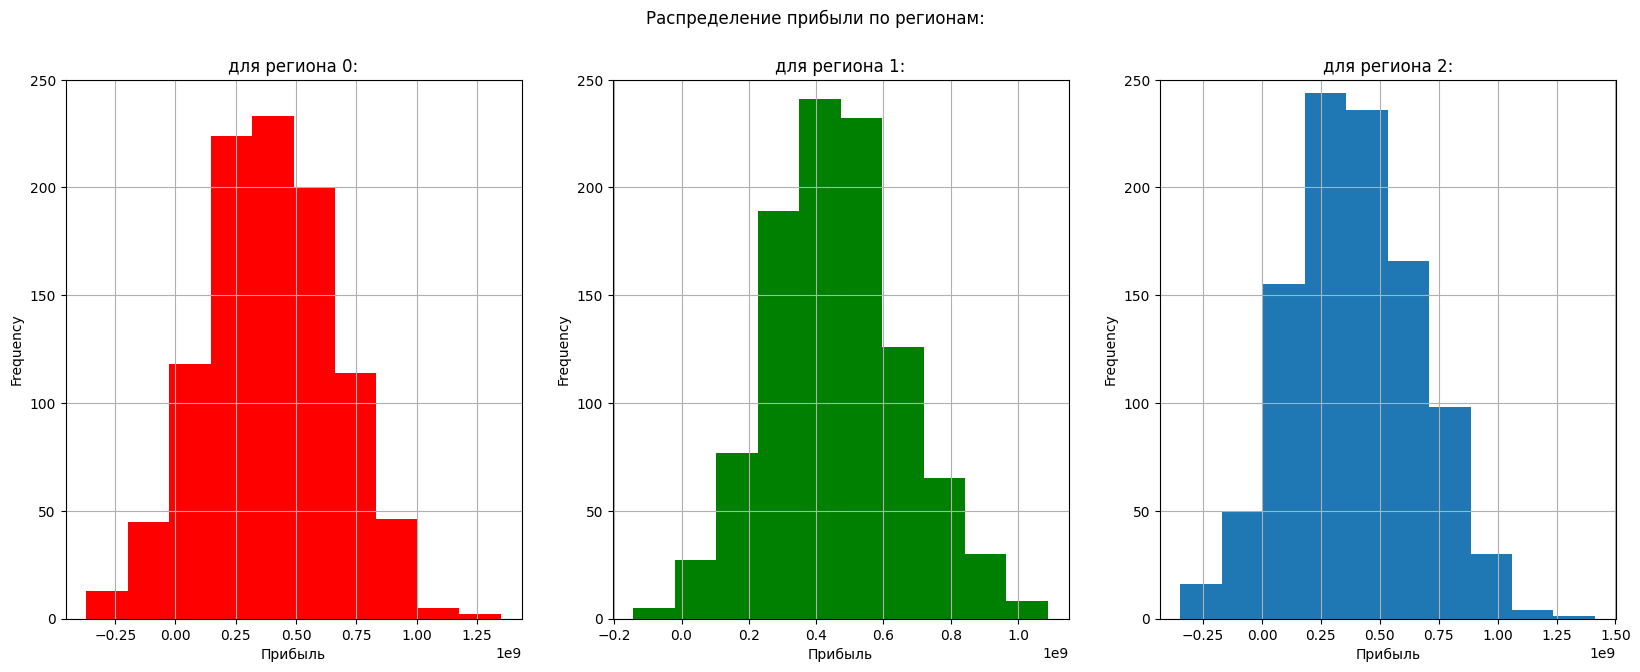

In [101]:
f, ax = plt.subplots(1, 3, figsize=(20,7))
f.suptitle('Распределение прибыли по регионам:')
ax[0] = profit_distribution_0.plot(kind='hist', color='red', ax=ax[0], ylim=(0, 250), grid=True)
ax[1] = profit_distribution_1.plot(kind='hist', color='green', ax=ax[1], ylim=(0, 250), grid=True)
ax[2] = profit_distribution_2.plot(kind='hist', ax=ax[2], ylim=(0, 250), grid=True)
ax[0].set_title('для региона 0:')
ax[0].set_xlabel('Прибыль')
ax[1].set_title('для региона 1:')
ax[1].set_xlabel('Прибыль')
ax[2].set_title('для региона 2:')
ax[2].set_xlabel('Прибыль')
plt.show()

In [104]:
table_profit_description

,mean,quantile 0.025,quantile 0.975,risk
region_0,3.965603e+08,-1.112155e+08,9.097669e+08,6.9
region_1,4.615311e+08,7.805081e+07,8.629521e+08,0.7
region_2,3.935213e+08,-1.122276e+08,9.345629e+08,6.3


### 5. Выводы:

      1) Техникой Bootstrap с 1000 выборок определили распределение прибыли для 3 регионов
      2) Средняя прибыль, 95%-й доверительный интервал и риск убытков отображены в итоговой таблице
      3) Для разработки скважин подходит больше всего регион 1, так как:
            - риск меньше 2,5%
            - средняя прибль выше 